In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("/content/log_data.csv")

### EDA and Data Cleaning

In [3]:
df.head()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,ROPA,ROP,RDEP,RSHA,RMED,...,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,MUDWEIGHT,RXO,SP,DCAL,RMIC,SGR
0,2927.7844,2.0,65030.0,8.869191,12.250001,25.167536,22.842165,2.842462,2.534627,3.020515,...,2927.784424,444920.34375,6421580.5,-2866.935303,NaN,NaN,NaN,NaN,NaN,NaN
1,2927.9364,2.0,65030.0,8.864833,12.250001,23.963020,21.530174,2.728668,2.681297,3.016522,...,2927.936279,444920.34375,6421580.5,-2867.087158,NaN,NaN,NaN,NaN,NaN,NaN
2,2928.0884,2.0,65030.0,8.837524,12.250001,23.825737,19.636332,2.934029,3.134141,3.356003,...,2928.088379,444920.34375,6421580.5,-2867.239258,NaN,NaN,NaN,NaN,NaN,NaN
3,2928.2404,2.0,65030.0,8.838326,12.250001,24.269821,18.848274,3.507820,3.995121,4.203135,...,2928.240478,444920.34375,6421580.5,-2867.391357,NaN,NaN,NaN,NaN,NaN,NaN
4,2928.3924,2.0,65030.0,8.846111,12.250001,24.782362,17.756601,4.167062,4.923522,5.212438,...,2928.392334,444920.34375,6421580.5,-2867.543213,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(12780, 27)

In [5]:
df.isna().sum()

DEPT                                     0
FORCE_2020_LITHOFACIES_CONFIDENCE        0
FORCE_2020_LITHOFACIES_LITHOLOGY         0
CALI                                     0
BS                                    2797
ROPA                                  7936
ROP                                   4245
RDEP                                     0
RSHA                                  3314
RMED                                     0
DTS                                   7936
DTC                                      1
NPHI                                     1
PEF                                   4284
GR                                       1
RHOB                                     1
DRHO                                     1
DEPTH_MD                                 1
X_LOC                                    1
Y_LOC                                    1
Z_LOC                                    1
MUDWEIGHT                             9089
RXO                                   6484
SP         

In [6]:
selected_columns = ["GR","RHOB","NPHI","RDEP","SP","FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [7]:
data = df[[i for i in df.columns if i in selected_columns]]

In [8]:
data.head()

,FORCE_2020_LITHOFACIES_LITHOLOGY,RDEP,NPHI,GR,RHOB,SP
0,65030.0,2.842462,0.259059,93.965614,2.521463,NaN
1,65030.0,2.728668,0.265082,84.551598,2.522877,NaN
2,65030.0,2.934029,0.276038,72.994385,2.535487,NaN
3,65030.0,3.507820,0.262020,57.243507,2.578729,NaN
4,65030.0,4.167062,0.264434,48.266670,2.579201,NaN


In [9]:
data = data.dropna()

In [10]:
data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

65000.0    3069
30000.0    2307
70000.0    1142
65030.0     932
80000.0     430
74000.0      43
90000.0      12
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

30000: Sandstone

65030: Sandstone/Shale

65000: Shale

80000: Marl

74000: Dolomite

70000: Limestone

70032: Chalk

88000: Halite

86000: Anhydrite

99000: Tuff

90000: Coal

93000: Basement

In [11]:
shale_rock = data.FORCE_2020_LITHOFACIES_LITHOLOGY == 65000

In [12]:
data["Shale_Rock"] = shale_rock

In [13]:
data.head()

,FORCE_2020_LITHOFACIES_LITHOLOGY,RDEP,NPHI,GR,RHOB,SP,Shale_Rock
1530,70000.0,2.229495,0.193377,15.814250,2.473303,34.212044,False
1531,70000.0,2.189437,0.195866,13.138697,2.478006,33.881351,False
1532,70000.0,2.155292,0.191624,11.918344,2.484432,34.464008,False
1533,70000.0,2.154393,0.191131,12.405447,2.490280,35.087601,False
1534,70000.0,2.162164,0.191056,13.027816,2.484339,33.214447,False


In [14]:
data.Shale_Rock.value_counts()

False    4866
True     3069
Name: Shale_Rock, dtype: int64

In [15]:
data = data.drop("FORCE_2020_LITHOFACIES_LITHOLOGY", axis = 1)

### Data Preparation

In [16]:
data.head()

,RDEP,NPHI,GR,RHOB,SP,Shale_Rock
1530,2.229495,0.193377,15.814250,2.473303,34.212044,False
1531,2.189437,0.195866,13.138697,2.478006,33.881351,False
1532,2.155292,0.191624,11.918344,2.484432,34.464008,False
1533,2.154393,0.191131,12.405447,2.490280,35.087601,False
1534,2.162164,0.191056,13.027816,2.484339,33.214447,False


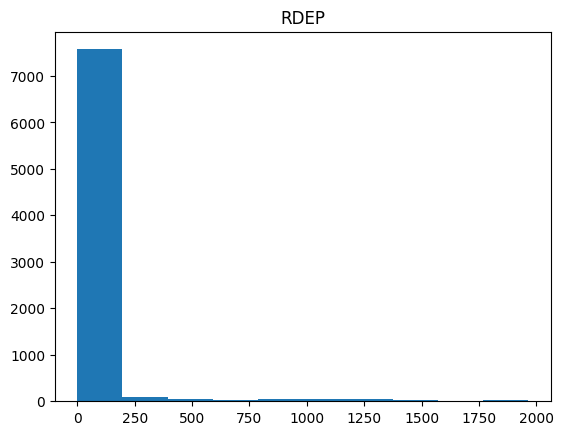

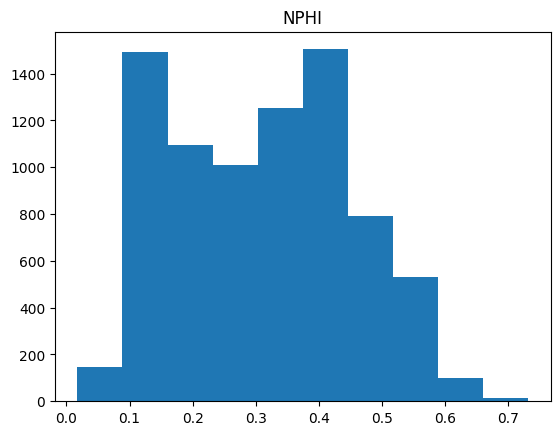

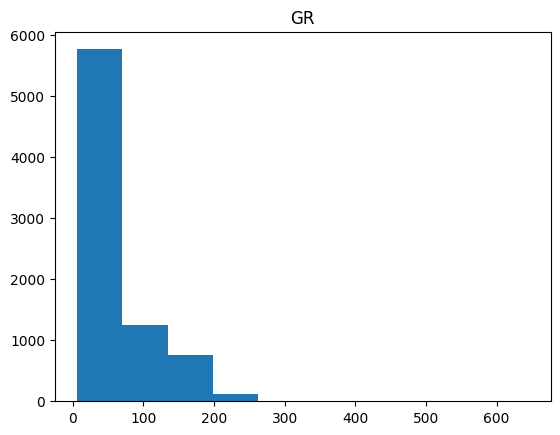

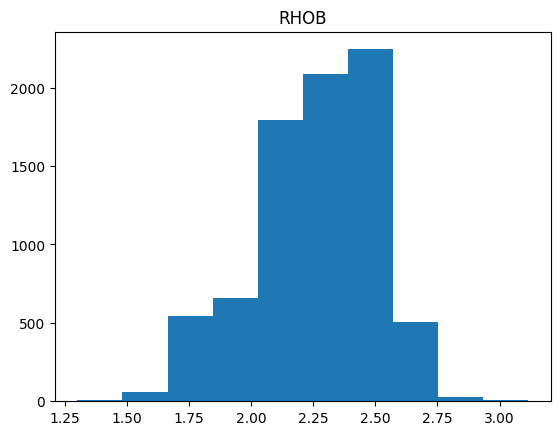

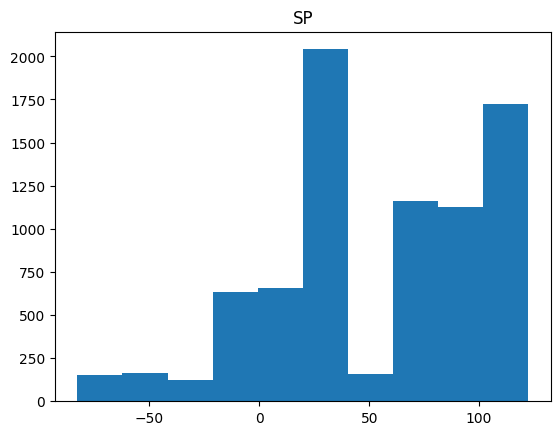

In [17]:
for i in range(len(data.columns)-1):
  plt.title(data.columns[i])
  plt.hist(data[data.columns[i]])
  plt.show()

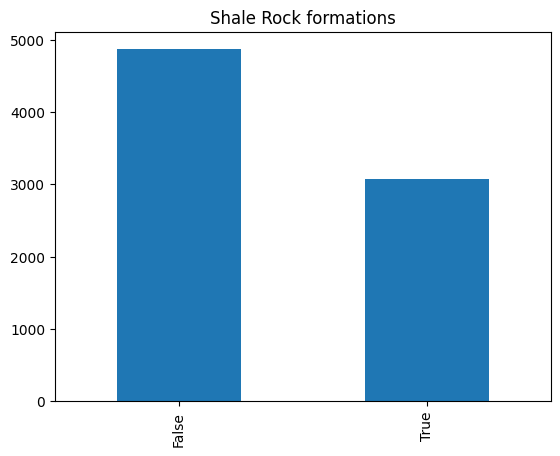

In [18]:
data.Shale_Rock.value_counts().plot(kind = "bar")
plt.title("Shale Rock formations")
plt.show()

In [19]:
encoding = []
for i in range(len(data)):
  if data.Shale_Rock.iloc[i] == False:
    encoding.append(0)
  else:
    encoding.append(1)
print(encoding)      

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [20]:
data["Shale_Rock"] = encoding

In [21]:
data.head()

,RDEP,NPHI,GR,RHOB,SP,Shale_Rock
1530,2.229495,0.193377,15.814250,2.473303,34.212044,0
1531,2.189437,0.195866,13.138697,2.478006,33.881351,0
1532,2.155292,0.191624,11.918344,2.484432,34.464008,0
1533,2.154393,0.191131,12.405447,2.490280,35.087601,0
1534,2.162164,0.191056,13.027816,2.484339,33.214447,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
for i in range(len(data.columns) - 1):
  data[data.columns[i]] = scaler.fit_transform(data[data.columns[i]].to_numpy().reshape(-1,1))

### ML Classifiers

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = data.drop("Shale_Rock", axis = 1)
y = data["Shale_Rock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{classifier.__class__.__name__}: {accuracy}')

LogisticRegression: 0.8890989287964713
DecisionTreeClassifier: 0.9521109010712036
SVC: 0.9357277882797732
KNeighborsClassifier: 0.9552614996849401
GaussianNB: 0.6225582860743542


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = data.drop("Shale_Rock", axis = 1)
y = data["Shale_Rock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_dt = {'max_depth': [None, 5, 10]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_nb = {}

classifiers = [
    ('Logistic Regression', LogisticRegression(), param_grid_lr),
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt),
    ('SVC', SVC(), param_grid_svc),
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Gaussian Naive Bayes', GaussianNB(), param_grid_nb)
]

for name, classifier, param_grid in classifiers:
    grid_search = GridSearchCV(classifier, param_grid, cv=5)

    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Best Parameters: {best_params}')
    print(f'Best Score: {best_score}')
    print(f'Test Accuracy: {accuracy}')
    print('-------------------------------------')

Logistic Regression:
Best Parameters: {'C': 0.1}
Best Score: 0.8868943864286468
Test Accuracy: 0.8872085696282294
-------------------------------------
Decision Tree:
Best Parameters: {'max_depth': 10}
Best Score: 0.9511673274883193
Test Accuracy: 0.9439193446754883
-------------------------------------
SVC:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9330492730961822
Test Accuracy: 0.9395085066162571
-------------------------------------
KNN:
Best Parameters: {'n_neighbors': 3}
Best Score: 0.9519547290631225
Test Accuracy: 0.9571518588531821
-------------------------------------
Gaussian Naive Bayes:
Best Parameters: {}
Best Score: 0.6334255381197917
Test Accuracy: 0.6225582860743542
-------------------------------------


### Ensemble Methods

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

X = data.drop("Shale_Rock", axis = 1)
y = data["Shale_Rock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[('RF', random_forest), ('ADA', adaboost), ('GB', gradient_boosting)])

for classifier in [random_forest, adaboost, gradient_boosting, voting]:
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'{classifier.__class__.__name__}: {accuracy}')

RandomForestClassifier: 0.9678638941398866
AdaBoostClassifier: 0.9199747952110902
GradientBoostingClassifier: 0.9489603024574669
VotingClassifier: 0.9508506616257089


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

X = data.drop("Shale_Rock", axis = 1)
y = data["Shale_Rock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {'n_estimators': [50], 'max_depth': [None]}
param_grid_ada = {'n_estimators': [100], 'learning_rate': [0.5]}
param_grid_gb = {'n_estimators': [150], 'learning_rate': [0.3]}

random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[('RF', random_forest), ('ADA', adaboost), ('GB', gradient_boosting)])

param_grid_voting = {'RF__n_estimators': [50],
                     'RF__max_depth': [None],
                     'ADA__n_estimators': [100],
                     'ADA__learning_rate': [0.5],
                     'GB__n_estimators': [150],
                     'GB__learning_rate': [0.3]} ## By experimenting on different Possibilities

grid_search = GridSearchCV(voting, param_grid_voting, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Voting Classifier:')
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')
print(f'Test Accuracy: {accuracy}')


Voting Classifier:
Best Parameters: {'ADA__learning_rate': 0.5, 'ADA__n_estimators': 100, 'GB__learning_rate': 0.3, 'GB__n_estimators': 150, 'RF__max_depth': None, 'RF__n_estimators': 50}
Best Score: 0.9562068216650225
Test Accuracy: 0.9596723377441714


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X = data.drop("Shale_Rock", axis = 1)
y = data["Shale_Rock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid_rf = {'n_estimators': [50,100,150], 'max_depth': [None, 5, 10]}
param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1,0.3, 0.5, 1]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1,0.3, 0.5, 1]}

random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()

grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_search_ada = GridSearchCV(adaboost, param_grid_ada, cv=5)
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)

grid_search_rf.fit(X_train, y_train)
grid_search_ada.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

y_pred_rf = grid_search_rf.predict(X_test)
y_pred_ada = grid_search_ada.predict(X_test)
y_pred_gb = grid_search_gb.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print('Random Forest Classifier:')
print(f'Best Parameters: {best_params_rf}')
print(f'Best Score: {best_score_rf}')
print(f'Test Accuracy: {accuracy_rf}')
print('-------------------------------------')

print('AdaBoost Classifier:')
print(f'Best Parameters: {best_params_ada}')
print(f'Best Score: {best_score_ada}')
print(f'Test Accuracy: {accuracy_ada}')
print('-------------------------------------')

print('Gradient Boosting Classifier:')
print(f'Best Parameters: {best_params_gb}')
print(f'Best Score: {best_score_gb}')
print(f'Test Accuracy: {accuracy_gb}')
print('-------------------------------------')

Random Forest Classifier:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9669187096293813
Test Accuracy: 0.9703843730308759
-------------------------------------
AdaBoost Classifier:
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 150}
Best Score: 0.9357281758219939
Test Accuracy: 0.9332073093887838
-------------------------------------
Gradient Boosting Classifier:
Best Parameters: {'learning_rate': 0.3, 'n_estimators': 100}
Best Score: 0.9536870125276893
Test Accuracy: 0.9533711405166981
-------------------------------------


In [35]:
Final_model = RandomForestClassifier(max_depth = None, n_estimators=150)

Final_model.fit(X_train, y_train)

accuracy = Final_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9710144927536232


In [36]:
import pickle

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(Final_model, file)

In [37]:
with open('/content/model.pkl', 'rb') as file:
    model = pickle.load(file)

predictions = model.predict(X_test)

acc = accuracy_score(y_test, predictions)

In [38]:
acc

0.9710144927536232